In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the CSV files into DataFrames
customers_df = pd.read_csv('customers2afd6ea.csv')
reason_df = pd.read_csv('reason18315ff.csv')
sentiment_df = pd.read_csv('sentiment_statisticscc1e57a.csv')
call_df=pd.read_csv('callsf0d4f5a.csv')

In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       71810 non-null  int64  
 1   customer_name     71810 non-null  object 
 2   elite_level_code  46043 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [7]:
customers_df.describe()

,customer_id,elite_level_code
count,7.181000e+04,46043.000000
mean,5.004334e+09,1.370871
std,2.884255e+09,1.322297
min,1.197800e+04,0.000000
25%,2.514618e+09,0.000000
50%,4.999664e+09,1.000000
75%,7.509126e+09,2.000000
max,9.999935e+09,5.000000


In [10]:
# Check for missing values in the customers DataFrame
customers_df.isnull().sum()


customer_id             0
customer_name           0
elite_level_code    25767
dtype: int64

In [8]:
# Calculate the number and percentage of missing values in the elite_level_code column
missing_values_count = customers_df['elite_level_code'].isnull().sum()
total_values_count = customers_df['elite_level_code'].shape[0]
missing_percentage = (missing_values_count / total_values_count) * 100

print(f"Number of missing values in elite_level_code: {missing_values_count}")
print(f"Percentage of missing values: {missing_percentage:.2f}%")


Number of missing values in elite_level_code: 25767
Percentage of missing values: 35.88%


In [9]:
# Fill missing elite_level_code values with -1 (No Membership)
customers_df['elite_level_code'] = customers_df['elite_level_code'].fillna(-1)


Distribution of Elite Level Codes:
elite_level_code
-1.0    25767
 0.0    14387
 1.0    14370
 2.0     8028
 3.0     5736
 4.0     2125
 5.0     1397
Name: count, dtype: int64


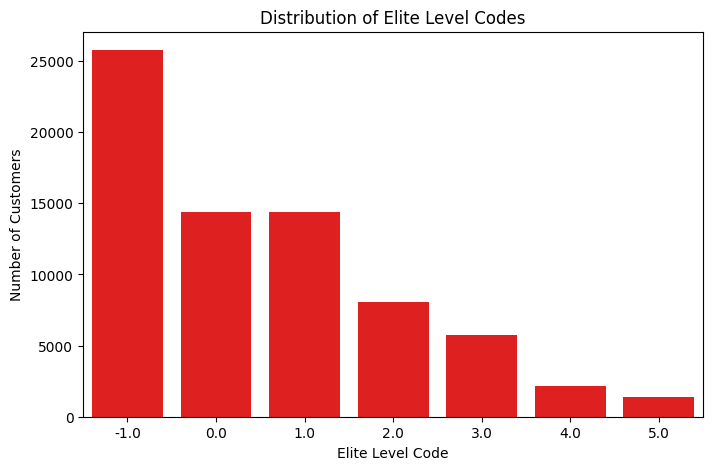

In [10]:
# Frequency distribution of elite_level_code
elite_level_distribution = customers_df['elite_level_code'].value_counts()
print("Distribution of Elite Level Codes:")
print(elite_level_distribution)

# Visualize the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='elite_level_code', data=customers_df, color='red')
plt.title('Distribution of Elite Level Codes')
plt.xlabel('Elite Level Code')
plt.ylabel('Number of Customers')
plt.show()


In [14]:
#This will help you see which elite levels are the most common.

In [11]:
reason_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   call_id              66653 non-null  int64 
 1   primary_call_reason  66653 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [12]:
# Check for missing values in the reason DataFrame
print("Missing values in reason DataFrame:")
print(reason_df.isnull().sum())


Missing values in reason DataFrame:
call_id                0
primary_call_reason    0
dtype: int64


In [13]:
# Get the number of unique primary call reasons
unique_reasons_count = reason_df['primary_call_reason'].nunique()
print(f"Number of unique primary call reasons: {unique_reasons_count}")

# Display unique primary call reasons
print("Unique primary call reasons:")
print(reason_df['primary_call_reason'].unique())


Number of unique primary call reasons: 54
Unique primary call reasons:
['Voluntary  Cancel' 'Booking' 'IRROPS' 'Upgrade' 'Seating'
 'Mileage   Plus' 'Checkout' 'Voluntary   Change' 'Post Flight' 'Check In'
 'Other  Topics' 'Communications' 'Schedule Change' 'Products & Services'
 'IRROPS  ' 'Digital   Support' 'Seating  ' 'Disability'
 'Unaccompanied Minor' ' Baggage' 'Traveler  Updates' 'Communications  '
 'ETC' 'Upgrade  ' 'Unaccompanied Minor  ' 'Voluntary Change'
 'Voluntary Change  ' 'Checkout  ' 'Mileage Plus' 'Mileage Plus  '
 'Booking  ' 'Baggage  ' 'Post-Flight' 'Post-Flight  ' 'Schedule Change  '
 'Baggage' 'Traveler Updates' 'Voluntary Cancel' 'Check-In'
 'Products and Services' 'Check-In  ' 'Other Topics' 'Other Topics  '
 'ETC  ' 'Disability  ' 'Digital Support' 'Digital Support  '
 'Voluntary Cancel  ' 'Products and Services  ' 'Traveler Updates  '
 'Traveler   Updates' 'Digital  Support' 'Mileage  Plus'
 'Voluntary  Change']


In [14]:
# Clean the 'primary_call_reason' column
reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.strip()  # Remove leading/trailing spaces
reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.replace(' +', ' ', regex=True)  # Replace multiple spaces with a single space
reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.title()  # Convert to title case for consistency

# Get unique cleaned reasons
unique_reasons = reason_df['primary_call_reason'].unique()
print("Cleaned unique primary call reasons:")
print(unique_reasons)

Cleaned unique primary call reasons:
['Voluntary Cancel' 'Booking' 'Irrops' 'Upgrade' 'Seating' 'Mileage Plus'
 'Checkout' 'Voluntary Change' 'Post Flight' 'Check In' 'Other Topics'
 'Communications' 'Schedule Change' 'Products & Services'
 'Digital Support' 'Disability' 'Unaccompanied Minor' 'Baggage'
 'Traveler Updates' 'Etc' 'Post-Flight' 'Check-In' 'Products And Services']


In [15]:
# Optionally, save the cleaned data to a new CSV file
reason_df.to_csv("cleaned_reasons.csv", index=False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11748\3602713785.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='primary_call_reason', y='call_count', data=call_reason_data, palette='viridis', dodge=False, legend=False)


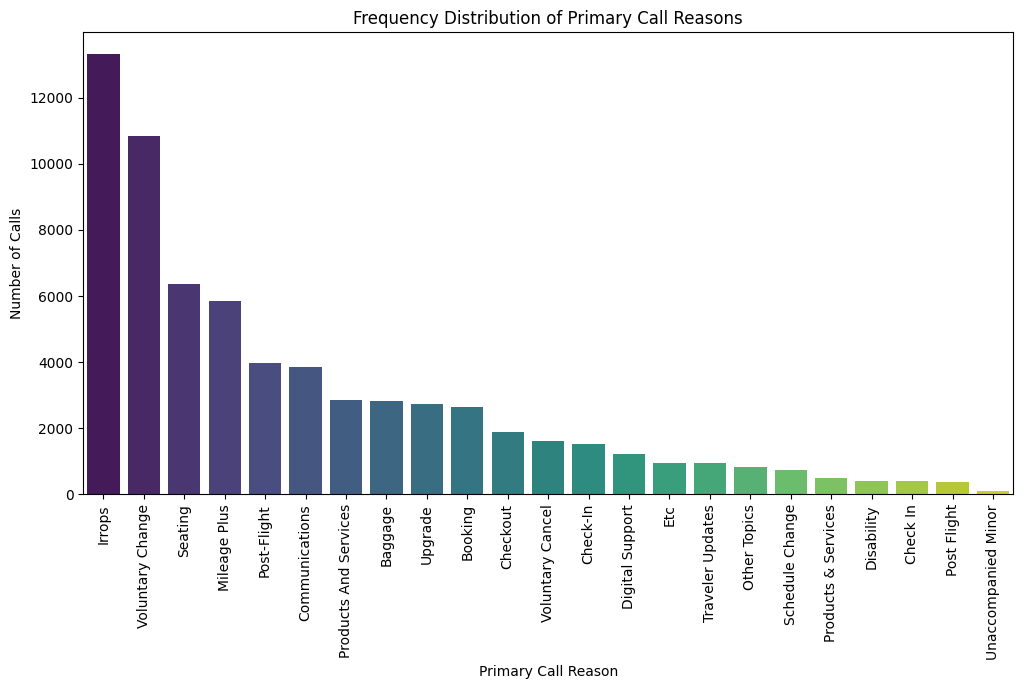

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset (assuming you saved the cleaned reasons in 'cleaned_reasons.csv')
df = pd.read_csv('cleaned_reasons.csv')

# Count occurrences of each primary call reason
call_reason_counts = df['primary_call_reason'].value_counts()

# Create a DataFrame to use for plotting
call_reason_data = pd.DataFrame({'primary_call_reason': call_reason_counts.index, 'call_count': call_reason_counts.values})

plt.figure(figsize=(12, 6))
sns.barplot(x='primary_call_reason', y='call_count', data=call_reason_data, palette='viridis', dodge=False, legend=False)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Frequency Distribution of Primary Call Reasons')
plt.xlabel('Primary Call Reason')
plt.ylabel('Number of Calls')
plt.show()


In [17]:
# Most frequent primary call reason
most_frequent_reason = call_reason_counts.idxmax()
most_frequent_reason_count = call_reason_counts.max()

# Least frequent primary call reason
least_frequent_reason = call_reason_counts.idxmin()
least_frequent_reason_count = call_reason_counts.min()

print(f"Most frequent primary call reason: {most_frequent_reason} with {most_frequent_reason_count} occurrences.")
print(f"Least frequent primary call reason: {least_frequent_reason} with {least_frequent_reason_count} occurrences.")


Most frequent primary call reason: Irrops with 13311 occurrences.
Least frequent primary call reason: Unaccompanied Minor with 104 occurrences.


In [18]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id                  71810 non-null  int64  
 1   agent_id                 71810 non-null  int64  
 2   agent_tone               71593 non-null  object 
 3   customer_tone            71810 non-null  object 
 4   average_sentiment        71701 non-null  float64
 5   silence_percent_average  71810 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.3+ MB


In [19]:
sentiment_df.describe()

,call_id,agent_id,average_sentiment,silence_percent_average
count,7.181000e+04,71810.000000,71701.000000,71810.000000
mean,4.993574e+09,564768.278039,-0.033519,0.285515
std,2.889673e+09,257532.362167,0.143715,0.192031
min,1.316420e+05,102574.000000,-1.380000,0.000000
25%,2.480013e+09,347606.000000,-0.110000,0.130000
50%,4.989448e+09,591778.000000,-0.020000,0.260000
75%,7.493629e+09,786323.000000,0.050000,0.410000
max,9.999806e+09,993862.000000,2.670000,0.980000


In [20]:
# Check for missing values in sentiment DataFrame
print("Missing values in sentiment DataFrame:")
print(sentiment_df.isnull().sum())


Missing values in sentiment DataFrame:
call_id                      0
agent_id                     0
agent_tone                 217
customer_tone                0
average_sentiment          109
silence_percent_average      0
dtype: int64


In [21]:
# Drop rows with missing `agent_tone` and `average_sentiment`
sentiment_df = sentiment_df.dropna(subset=['agent_tone', 'average_sentiment'])



In [22]:
# Check if missing values have been removed
print(sentiment_df.isnull().sum())


call_id                    0
agent_id                   0
agent_tone                 0
customer_tone              0
average_sentiment          0
silence_percent_average    0
dtype: int64


In [23]:
# Get summary statistics for numeric columns
sentiment_summary = sentiment_df[['average_sentiment', 'silence_percent_average']].describe()
print("Summary Statistics for Sentiment DataFrame:")
print(sentiment_summary)


Summary Statistics for Sentiment DataFrame:
       average_sentiment  silence_percent_average
count       71593.000000             71593.000000
mean           -0.032592                 0.285689
std             0.141484                 0.191922
min            -0.940000                 0.000000
25%            -0.110000                 0.130000
50%            -0.020000                 0.260000
75%             0.050000                 0.410000
max             2.670000                 0.980000


Distribution of Agent Tones:
agent_tone
neutral       42758
calm          24675
frustrated     3684
angry           389
polite           87
Name: count, dtype: int64
Distribution of Customer Tones:
customer_tone
neutral       14407
angry         14367
polite        14318
calm          14302
frustrated    14199
Name: count, dtype: int64


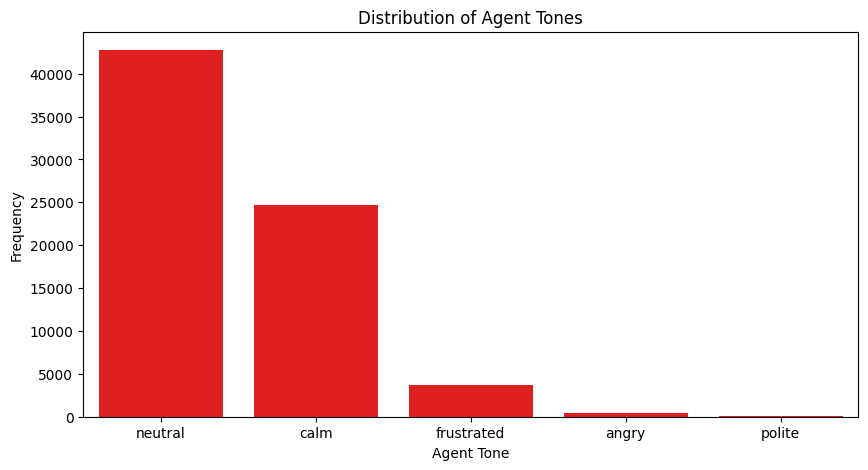

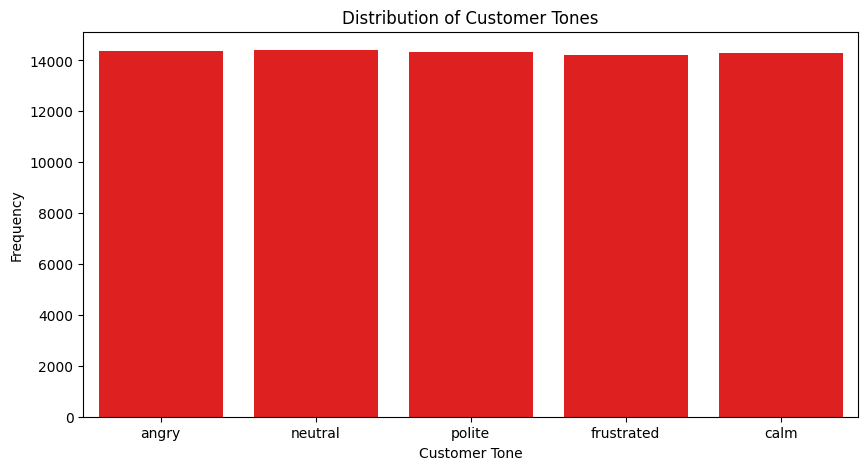

In [27]:
# Distribution of agent tones
agent_tone_counts = sentiment_df['agent_tone'].value_counts()
print("Distribution of Agent Tones:")
print(agent_tone_counts)

# Distribution of customer tones
customer_tone_counts = sentiment_df['customer_tone'].value_counts()
print("Distribution of Customer Tones:")
print(customer_tone_counts)

# Visualize agent tone distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='agent_tone', data=sentiment_df, color='red')  
plt.title('Distribution of Agent Tones')
plt.xlabel('Agent Tone')
plt.ylabel('Frequency')
plt.show()


# Visualize customer tone distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='customer_tone', data=sentiment_df,color='red')
plt.title('Distribution of Customer Tones')
plt.xlabel('Customer Tone')
plt.ylabel('Frequency')
plt.show()


In [28]:
# Correlation analysis
correlation = sentiment_df[['average_sentiment', 'silence_percent_average']].corr()
print("Correlation between Average Sentiment and Silence Percentage:")
print(correlation)


Correlation between Average Sentiment and Silence Percentage:
                         average_sentiment  silence_percent_average
average_sentiment                 1.000000                 0.031762
silence_percent_average           0.031762                 1.000000


Average Sentiment Score by Agent Tone:
   agent_tone  average_sentiment
0       angry          -0.616478
1        calm           0.101289
2  frustrated          -0.329978
3     neutral          -0.080355
4      polite           0.673793
Average Sentiment Score by Customer Tone:
  customer_tone  average_sentiment
0         angry          -0.031527
1          calm          -0.031617
2    frustrated          -0.033552
3       neutral          -0.032741
4        polite          -0.033533


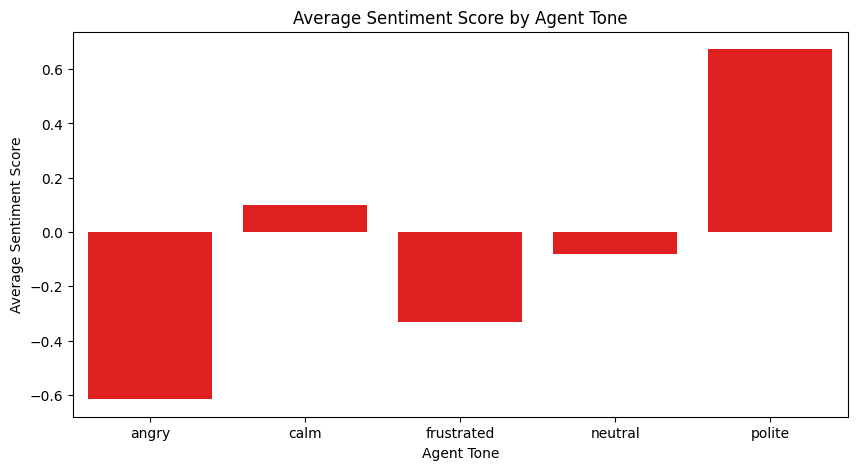

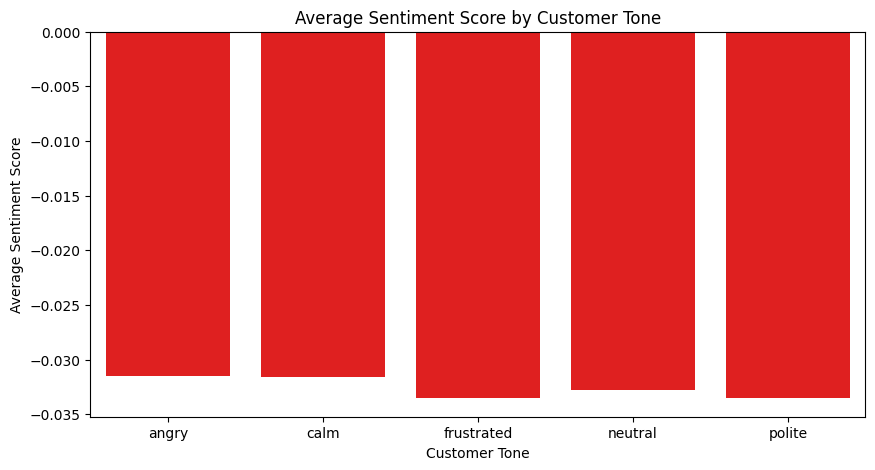

In [30]:
# Average sentiment by agent tone
sentiment_by_agent_tone = sentiment_df.groupby('agent_tone')['average_sentiment'].mean().reset_index()
print("Average Sentiment Score by Agent Tone:")
print(sentiment_by_agent_tone)

# Average sentiment by customer tone
sentiment_by_customer_tone = sentiment_df.groupby('customer_tone')['average_sentiment'].mean().reset_index()
print("Average Sentiment Score by Customer Tone:")
print(sentiment_by_customer_tone)

# Visualize average sentiment by agent tone
plt.figure(figsize=(10, 5))
sns.barplot(x='agent_tone', y='average_sentiment', data=sentiment_by_agent_tone, color='red')
plt.title('Average Sentiment Score by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Average Sentiment Score')
plt.show()

# Visualize average sentiment by customer tone
plt.figure(figsize=(10, 5))
sns.barplot(x='customer_tone', y='average_sentiment', data=sentiment_by_customer_tone, color='red')
plt.title('Average Sentiment Score by Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Average Sentiment Score')
plt.show()


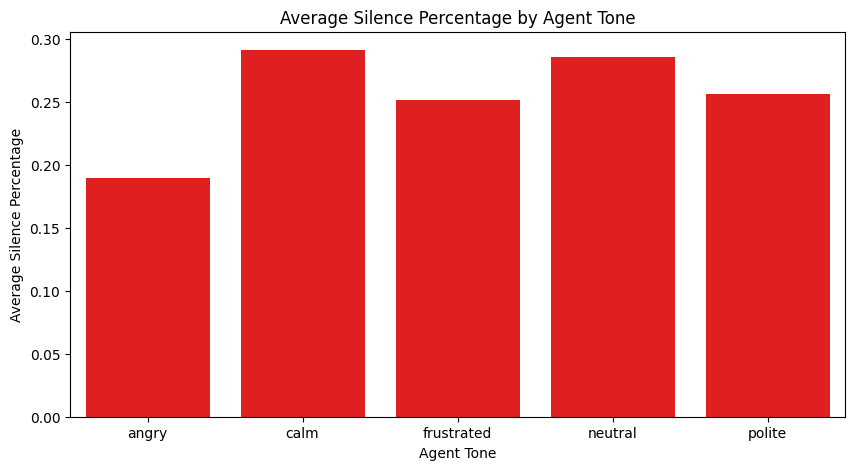

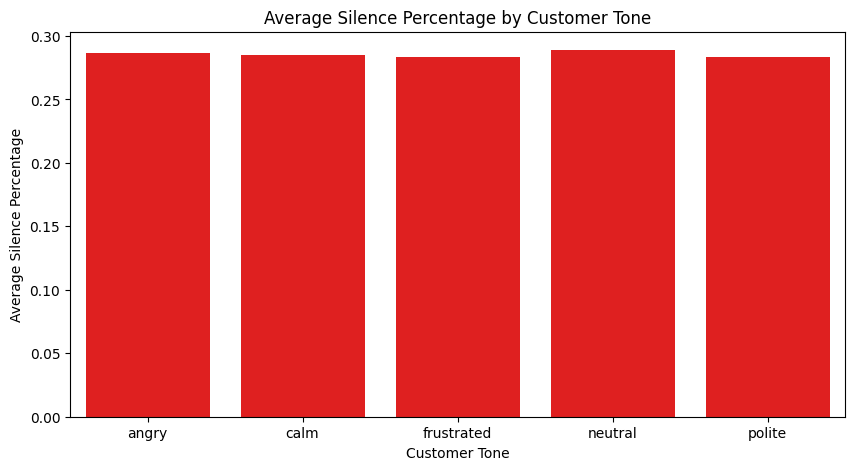

In [5]:
silence_by_agent_tone = sentiment_df.groupby('agent_tone')['silence_percent_average'].mean().reset_index()



# Visualize average silence percentage by agent tone
plt.figure(figsize=(10, 5))
sns.barplot(x='agent_tone', y='silence_percent_average', data=silence_by_agent_tone, color='red')
plt.title('Average Silence Percentage by Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Average Silence Percentage')
plt.show()
silence_by_customer_tone = sentiment_df.groupby('customer_tone')['silence_percent_average'].mean().reset_index()

# Visualize average silence percentage by customer tone
plt.figure(figsize=(10, 5))
sns.barplot(x='customer_tone', y='silence_percent_average', data=silence_by_customer_tone, color='red')
plt.title('Average Silence Percentage by Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Average Silence Percentage')
plt.show()


In [31]:
call_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB


In [32]:
print(call_df.isnull().sum())

call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64


In [33]:
call_df['call_start_datetime'] = pd.to_datetime(call_df['call_start_datetime'])
call_df['agent_assigned_datetime'] = pd.to_datetime(call_df['agent_assigned_datetime'])
call_df['call_end_datetime'] = pd.to_datetime(call_df['call_end_datetime'])

In [34]:
call_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  71810 non-null  int64         
 1   customer_id              71810 non-null  int64         
 2   agent_id                 71810 non-null  int64         
 3   call_start_datetime      71810 non-null  datetime64[ns]
 4   agent_assigned_datetime  71810 non-null  datetime64[ns]
 5   call_end_datetime        71810 non-null  datetime64[ns]
 6   call_transcript          71810 non-null  object        
dtypes: datetime64[ns](3), int64(3), object(1)
memory usage: 3.8+ MB


In [35]:
print(call_df.head())

      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118 2024-07-31 23:56:00   
1  1122072124   8186702651    519057 2024-08-01 00:03:00   
2  6834291559   2416856629    158319 2024-07-31 23:59:00   
3  2266439882   1154544516    488324 2024-08-01 00:05:00   
4  1211603231   5214456437    721730 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0     2024-08-01 00:03:00 2024-08-01 00:34:00   
1     2024-08-01 00:06:00 2024-08-01 00:18:00   
2     2024-08-01 00:07:00 2024-08-01 00:26:00   
3     2024-08-01 00:10:00 2024-08-01 00:17:00   
4     2024-08-01 00:14:00 2024-08-01 00:23:00   

                                     call_transcript  
0  \n\nAgent: Thank you for calling United Airlin...  
1  \n\nAgent: Thank you for calling United Airlin...  
2  \n\nAgent: Thank you for calling United Airlin...  
3  \n\nAgent: Thank you for calling United Airlin...  
4  \n\nAgent: Thank you for calling United Airlin...  


In [36]:
# Step 2: Calculate call duration
call_df['call_duration'] = (call_df['call_end_datetime'] - call_df['call_start_datetime']).dt.total_seconds() / 60  # Duration in minutes

In [37]:
# Step 3: Calculate Wait Time
call_df['wait_time'] = (call_df['agent_assigned_datetime'] - call_df['call_start_datetime']).dt.total_seconds() / 60  # Wait time in minutes

# Step 4: Calculate Handling Time
# Handling time can also be calculated as:
call_df['handling_time'] = (call_df['call_end_datetime'] - call_df['agent_assigned_datetime']).dt.total_seconds() / 60  # Handling time in minutes


In [38]:
# Display the first few entries to see the new columns
print(call_df[['call_id', 'call_duration', 'wait_time', 'handling_time']].head())

      call_id  call_duration  wait_time  handling_time
0  4667960400           38.0        7.0           31.0
1  1122072124           15.0        3.0           12.0
2  6834291559           27.0        8.0           19.0
3  2266439882           12.0        5.0            7.0
4  1211603231           19.0       10.0            9.0


In [39]:
# Calculate the averages
average_wait_time = call_df['wait_time'].mean()
average_call_duration = call_df['call_duration'].mean()
average_handling_time = call_df['handling_time'].mean()

# Print the results
print(f"Average Wait Time: {average_wait_time:.2f} minutes")
print(f"Average Call Duration: {average_call_duration:.2f} minutes")
print(f"Average Handling Time: {average_handling_time:.2f} minutes")


Average Wait Time: 7.28 minutes
Average Call Duration: 18.90 minutes
Average Handling Time: 11.62 minutes


In [40]:
# Calculate Total Handle Time and Total Waiting Time
total_handle_time = call_df['handling_time'].sum()  # Total Handle Time in minutes
total_wait_time = call_df['wait_time'].sum()        # Total Waiting Time in minutes

# Count Total Number of Calls
total_call = len(call_df)                             # Total Number of Calls

# Calculate AHT and AST
AHT = total_handle_time / total_call if total_call > 0 else 0  # Average Handle Time
AST = total_wait_time / total_call if total_call > 0 else 0      # Average Speed to Answer

# Print the results
print(f"Total Handle Time: {total_handle_time:.2f} minutes")
print(f"Total Waiting Time: {total_wait_time:.2f} minutes")
print(f"Total Number of Call: {total_call}")
print(f"Average Handle Time (AHT): {AHT:.2f} minutes")
print(f"Average Speed to Answer (AST): {AST:.2f} minutes")


Total Handle Time: 834251.00 minutes
Total Waiting Time: 523097.00 minutes
Total Number of Call: 71810
Average Handle Time (AHT): 11.62 minutes
Average Speed to Answer (AST): 7.28 minutes


In [41]:
# Step 3: Call volume analysis
call_df['call_date'] = call_df['call_start_datetime'].dt.date
call_volume = call_df.groupby('call_date')['call_id'].count().reset_index()
call_volume.columns = ['Date', 'Call Volume']
# Display call volume by date
print("Call Volume by Date:")
print(call_volume)

Call Volume by Date:
          Date  Call Volume
0   2024-07-31            2
1   2024-08-01         1281
2   2024-08-02         1342
3   2024-08-03         4831
4   2024-08-04         4793
5   2024-08-05         1287
6   2024-08-06         1357
7   2024-08-07         1254
8   2024-08-08         1336
9   2024-08-09         1344
10  2024-08-10         4866
11  2024-08-11         4731
12  2024-08-12         1307
13  2024-08-13         1306
14  2024-08-14         1320
15  2024-08-15         1249
16  2024-08-16         1324
17  2024-08-17         4814
18  2024-08-18         4804
19  2024-08-19         1344
20  2024-08-20         1276
21  2024-08-21         1309
22  2024-08-22         1308
23  2024-08-23         1281
24  2024-08-24         4711
25  2024-08-25         4774
26  2024-08-26         1289
27  2024-08-27         1324
28  2024-08-28         1291
29  2024-08-29         1337
30  2024-08-30         1288
31  2024-08-31         4730


In [44]:
# Step 1: Calculate Average Handling Time (AHT) per Agent
agent_performance = call_df.groupby('agent_id')['handling_time'].mean().reset_index()
agent_performance.columns = ['agent_id', 'average_handling_time']  

# Step 2: Sort agents by their average handling time
agent_performance = agent_performance.sort_values(by='average_handling_time')

# Print the average handling time for each agent
print(agent_performance)



     agent_id  average_handling_time
184    547592               3.000000
210    616988               4.750000
23     161354               6.000000
48     229129               6.222222
238    676262               6.500000
..        ...                    ...
187    558705              33.000000
60     255256              43.666667
16     140146              43.666667
160    506130              48.000000
0      102574              60.000000

[383 rows x 2 columns]


In [45]:
# Read the cleaned reasons DataFrame
cleaned_reason_df = pd.read_csv('cleaned_reasons.csv')

# Merge DataFrames
merged_df = pd.merge(call_df, customers_df, on='customer_id', how='left')
merged_df = pd.merge(merged_df, cleaned_reason_df, on='call_id', how='left')
merged_df = pd.merge(merged_df, sentiment_df, on='call_id', how='left')

# Drop duplicate 'agent_id' columns if they exist
if 'agent_id_x' in merged_df.columns or 'agent_id_y' in merged_df.columns:
    merged_df['agent_id'] = merged_df.get('agent_id_x', merged_df.get('agent_id_y'))
    merged_df.drop(['agent_id_x', 'agent_id_y'], axis=1, inplace=True)

# Drop the 'silence_category' column from merged_df if it exists
merged_df.drop(columns=[col for col in ['silence_category'] if col in merged_df.columns], inplace=True)

# Verify by printing the head of the updated DataFrame
print(merged_df.head())


      call_id  customer_id call_start_datetime agent_assigned_datetime  \
0  4667960400   2033123310 2024-07-31 23:56:00     2024-08-01 00:03:00   
1  1122072124   8186702651 2024-08-01 00:03:00     2024-08-01 00:06:00   
2  6834291559   2416856629 2024-07-31 23:59:00     2024-08-01 00:07:00   
3  2266439882   1154544516 2024-08-01 00:05:00     2024-08-01 00:10:00   
4  1211603231   5214456437 2024-08-01 00:04:00     2024-08-01 00:14:00   

    call_end_datetime                                    call_transcript  \
0 2024-08-01 00:34:00  \n\nAgent: Thank you for calling United Airlin...   
1 2024-08-01 00:18:00  \n\nAgent: Thank you for calling United Airlin...   
2 2024-08-01 00:26:00  \n\nAgent: Thank you for calling United Airlin...   
3 2024-08-01 00:17:00  \n\nAgent: Thank you for calling United Airlin...   
4 2024-08-01 00:23:00  \n\nAgent: Thank you for calling United Airlin...   

   call_duration  wait_time  handling_time   call_date      customer_name  \
0           38.0     

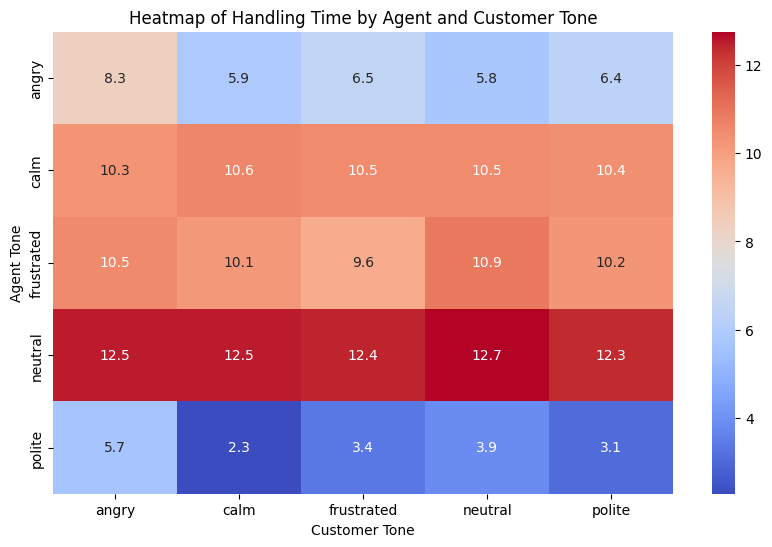

In [47]:
plt.figure(figsize=(10, 6))
heatmap_data = merged_df.pivot_table(values='handling_time', index='agent_tone', columns='customer_tone', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Heatmap of Handling Time by Agent and Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Agent Tone')
plt.show()


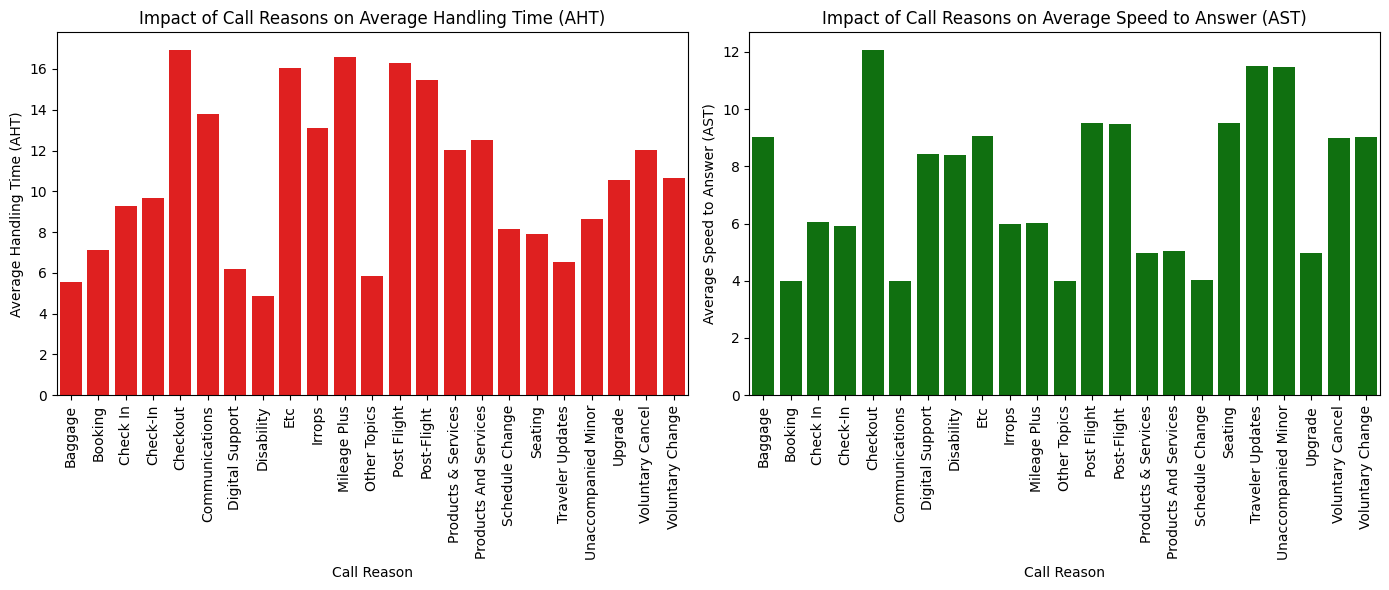

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df already contains 'call_reason', 'handling_time', and 'wait_time' columns

# Grouping by call reasons to calculate AHT and AST
call_reason_impact = merged_df.groupby('primary_call_reason').agg(
    {
        'handling_time': 'mean',  # Average Handling Time (AHT)
        'wait_time': 'mean'       # Average Speed to Answer (AST)
    }
).reset_index()

# Rename columns for clarity
call_reason_impact.rename(columns={
    'handling_time': 'Average Handling Time (AHT)',
    'wait_time': 'Average Speed to Answer (AST)'
}, inplace=True)

# Set figure size for the plots
plt.figure(figsize=(14, 6))

# Create subplots for AHT and AST
plt.subplot(1, 2, 1)
sns.barplot(data=call_reason_impact, x='primary_call_reason', y='Average Handling Time (AHT)', color='red')
plt.xticks(rotation=90)
plt.title("Impact of Call Reasons on Average Handling Time (AHT)")
plt.xlabel("Call Reason")
plt.ylabel("Average Handling Time (AHT)")

plt.subplot(1, 2, 2)
sns.barplot(data=call_reason_impact, x='primary_call_reason', y='Average Speed to Answer (AST)', color='Green')
plt.xticks(rotation=90)
plt.title("Impact of Call Reasons on Average Speed to Answer (AST)")
plt.xlabel("Call Reason")
plt.ylabel("Average Speed to Answer (AST)")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


   Agent Tone  Average Handling Time (AHT)
0       angry                     6.573265
1        calm                    10.441662
2  frustrated                    10.284473
3     neutral                    12.504607
4      polite                     3.666667


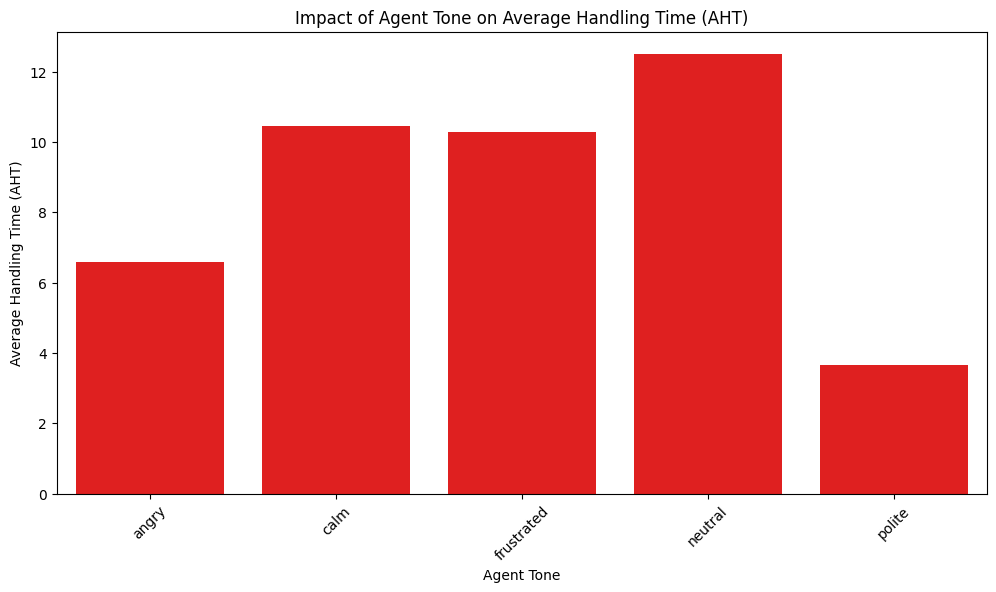

In [48]:
# Calculate AHT grouped by agent tone
tone_aht = merged_df.groupby('agent_tone').agg({'handling_time': 'mean'}).reset_index()

# Rename the columns for clarity
tone_aht.columns = ['Agent Tone', 'Average Handling Time (AHT)']

# Display the calculated AHT by Agent Tone
print(tone_aht)

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the relationship between Agent Tone and AHT
plt.figure(figsize=(12, 6))
sns.barplot(data=tone_aht, x='Agent Tone', y='Average Handling Time (AHT)', color='red')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Impact of Agent Tone on Average Handling Time (AHT)')
plt.xlabel('Agent Tone')
plt.ylabel('Average Handling Time (AHT)')
plt.show()


      Primary Call Reason  Average Silence Percentage
0                 Baggage                    0.250937
1                 Booking                    0.261018
2                Check In                    0.264857
3                Check-In                    0.262299
4                Checkout                    0.292689
5          Communications                    0.303777
6         Digital Support                    0.284820
7              Disability                    0.248905
8                     Etc                    0.287947
9                  Irrops                    0.309566
10           Mileage Plus                    0.275318
11           Other Topics                    0.272623
12            Post Flight                    0.296550
13            Post-Flight                    0.298489
14    Products & Services                    0.275200
15  Products And Services                    0.277486
16        Schedule Change                    0.267493
17                Seating   

C:\Users\DELL\AppData\Local\Temp\ipykernel_5116\3357013938.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=silence_reason, x='Primary Call Reason', y='Average Silence Percentage', palette='coolwarm')


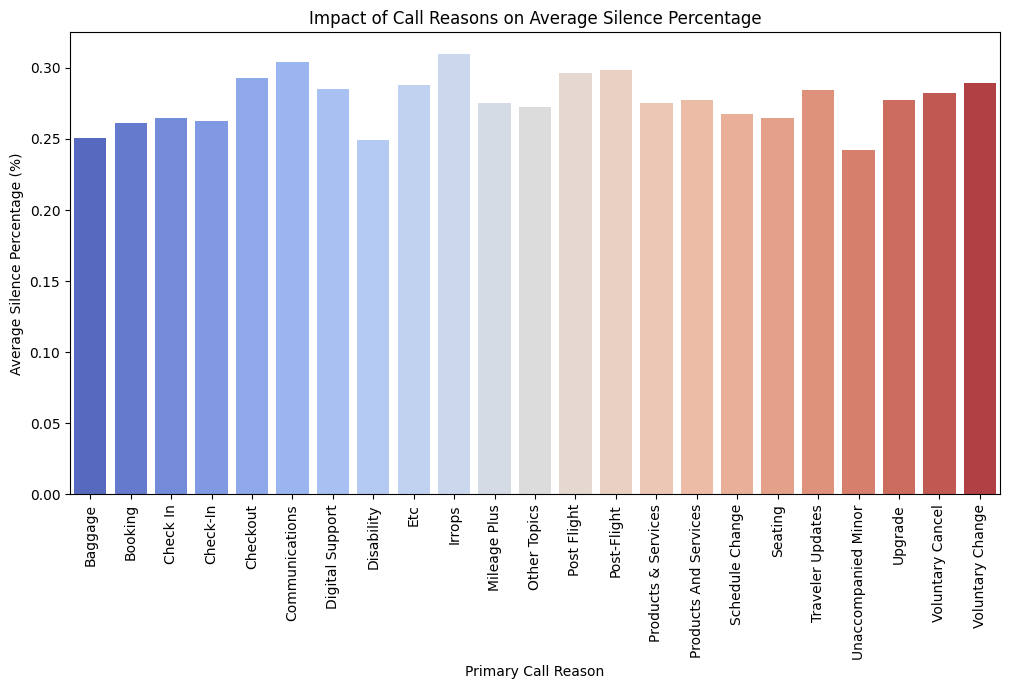

In [49]:
# Calculate average silence percentage grouped by primary call reason
silence_reason = merged_df.groupby('primary_call_reason').agg({'silence_percent_average': 'mean'}).reset_index()

# Rename the columns for clarity
silence_reason.columns = ['Primary Call Reason', 'Average Silence Percentage']

# Display the calculated average silence percentage by call reason
print(silence_reason)
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the relationship between Call Reasons and Average Silence Percentage
plt.figure(figsize=(12, 6))
sns.barplot(data=silence_reason, x='Primary Call Reason', y='Average Silence Percentage', palette='coolwarm')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Impact of Call Reasons on Average Silence Percentage')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Silence Percentage (%)')
plt.show()


   elite_level_code  Average Handling Time (AHT)
0              -1.0                    11.136221
1               0.0                    11.599986
2               1.0                    11.472860
3               2.0                    12.107499
4               3.0                    12.125174
5               4.0                    13.137412
6               5.0                    14.949177


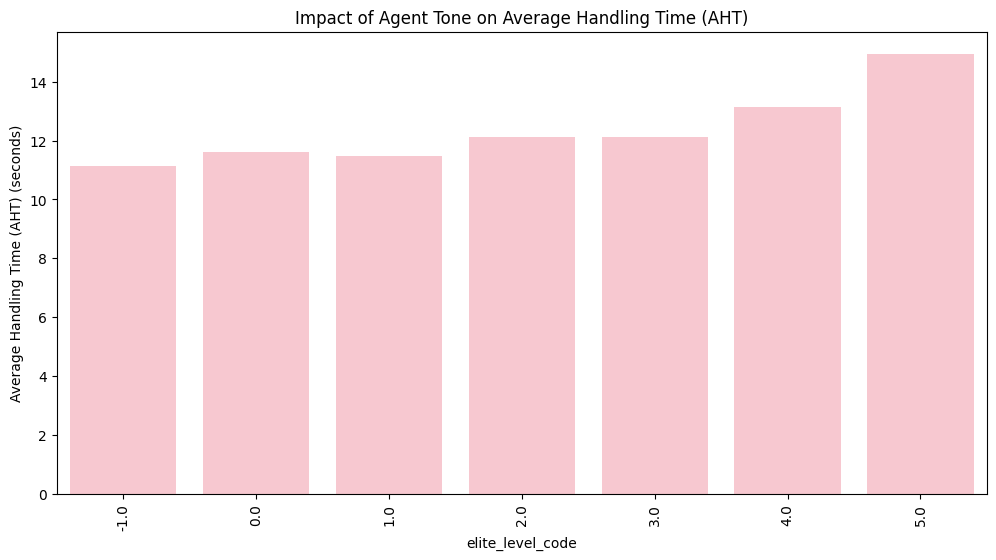

In [50]:
# Calculate average handling time grouped by agent tone
aht_by_tone = merged_df.groupby('elite_level_code').agg({'handling_time': 'mean'}).reset_index()

# Rename the columns for clarity
aht_by_tone.columns = ['elite_level_code', 'Average Handling Time (AHT)']

# Display the calculated average handling time by agent tone
print(aht_by_tone)
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the relationship between Agent Tone and Average Handling Time (AHT)
plt.figure(figsize=(12, 6))
sns.barplot(data=aht_by_tone, x='elite_level_code', y='Average Handling Time (AHT)', color='Pink')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Impact of Agent Tone on Average Handling Time (AHT)')
plt.xlabel('elite_level_code')
plt.ylabel('Average Handling Time (AHT) (seconds)')
plt.show()



In [56]:
# Calculate average silence percentage and average handling time grouped by primary call reason
reason_analysis = merged_df.groupby('primary_call_reason').agg({
    'silence_percent_average': 'mean',
    'handling_time': 'mean'
}).reset_index()

# Rename the columns for clarity
reason_analysis.columns = ['Primary Call Reason', 'Average Silence Percentage', 'Average Handling Time (AHT)']

# Display the calculated averages
print(reason_analysis)


      Primary Call Reason  Average Silence Percentage  \
0                 Baggage                    0.250937   
1                 Booking                    0.261018   
2                Check In                    0.264857   
3                Check-In                    0.262299   
4                Checkout                    0.292689   
5          Communications                    0.303777   
6         Digital Support                    0.284820   
7              Disability                    0.248905   
8                     Etc                    0.287947   
9                  Irrops                    0.309566   
10           Mileage Plus                    0.275318   
11           Other Topics                    0.272623   
12            Post Flight                    0.296550   
13            Post-Flight                    0.298489   
14    Products & Services                    0.275200   
15  Products And Services                    0.277486   
16        Schedule Change      

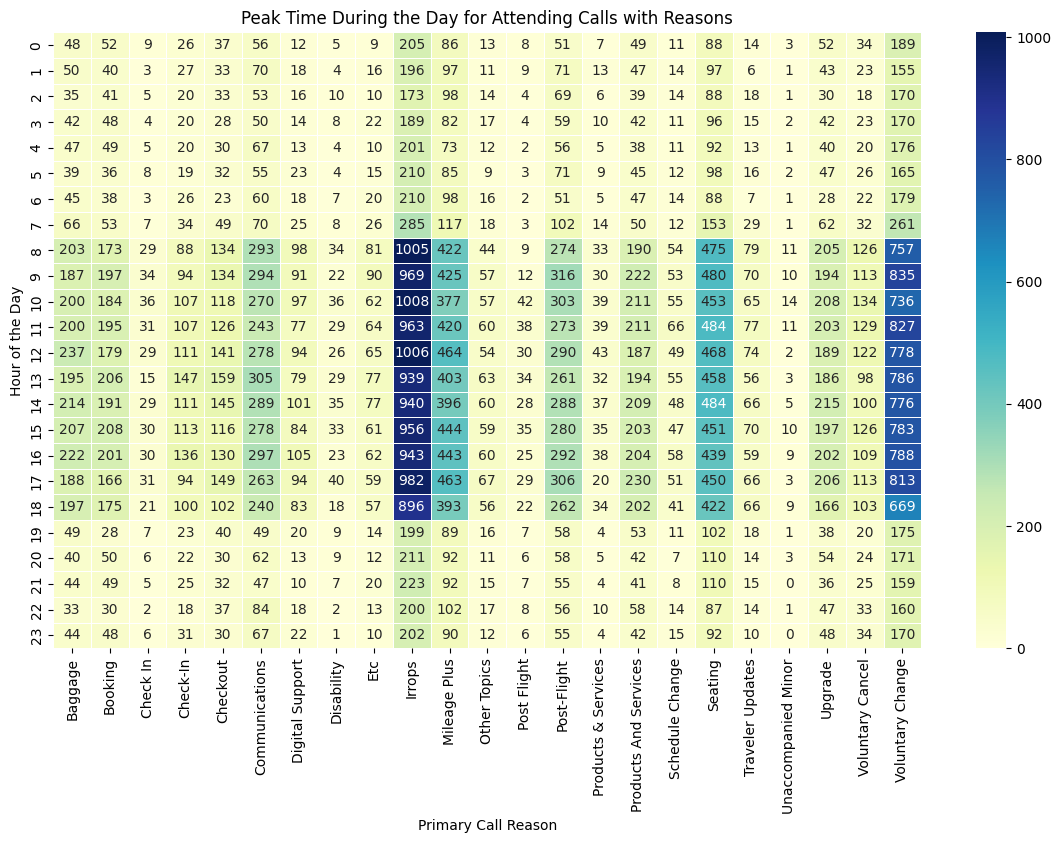

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in merged_df after merging call_df, reason_df, and other relevant files
# Ensure 'call_start_datetime' is in datetime format
merged_df['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'])

# Extract the hour from the 'call_start_datetime' column
merged_df['call_hour'] = merged_df['call_start_datetime'].dt.hour

# Group by call hour and primary call reason, then count the number of calls
call_peak_df = merged_df.groupby(['call_hour', 'primary_call_reason']).size().reset_index(name='call_count')

# Pivot the DataFrame for heatmap visualization using pivot_table
call_peak_pivot = call_peak_df.pivot_table(index='call_hour', columns='primary_call_reason', values='call_count', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(call_peak_pivot, cmap='YlGnBu', linewidths=.5, annot=True, fmt=".0f")  # Changed fmt to ".0f"
plt.title("Peak Time During the Day for Attending Calls with Reasons")
plt.xlabel("Primary Call Reason")
plt.ylabel("Hour of the Day")
plt.show()


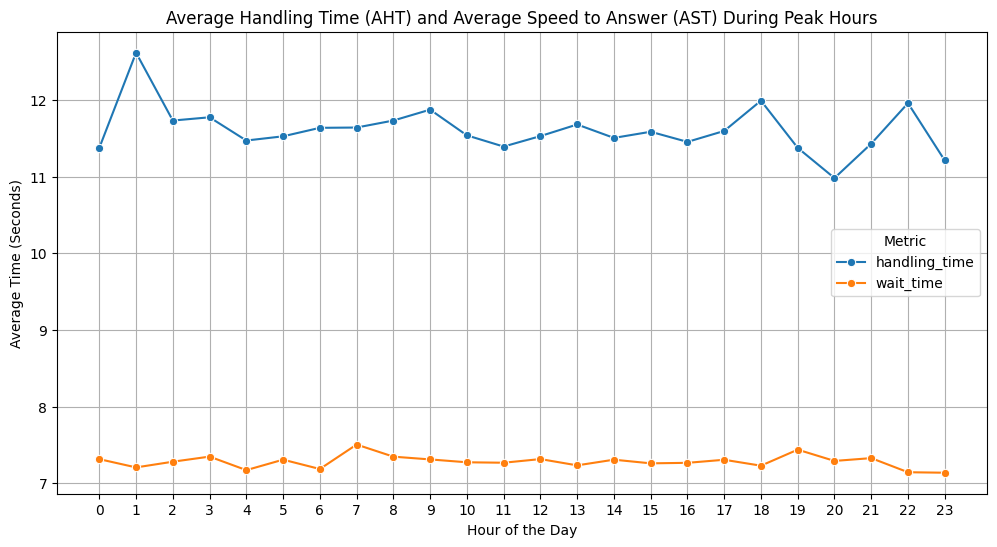

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'call_start_datetime' is in datetime format
merged_df['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'])

# Extract the hour from the 'call_start_datetime' column
merged_df['call_hour'] = merged_df['call_start_datetime'].dt.hour

# Group by call hour and calculate average AHT and AST
# Replace 'handling_time' and 'wait_time' with your exact column names for AHT and AST, if different
hourly_aht_ast = merged_df.groupby('call_hour').agg({'handling_time': 'mean', 'wait_time': 'mean'}).reset_index()

# Melt the DataFrame to have 'handling_time' and 'wait_time' as values in a single column
hourly_aht_ast_melted = pd.melt(hourly_aht_ast, id_vars=['call_hour'], value_vars=['handling_time', 'wait_time'], var_name='Metric', value_name='Time')

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_aht_ast_melted, x='call_hour', y='Time', hue='Metric', marker='o')
plt.xticks(range(0, 24))  # Show all hours on x-axis
plt.title("Average Handling Time (AHT) and Average Speed to Answer (AST) During Peak Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Time (Seconds)")
plt.grid(True)
plt.legend(title='Metric')
plt.show()


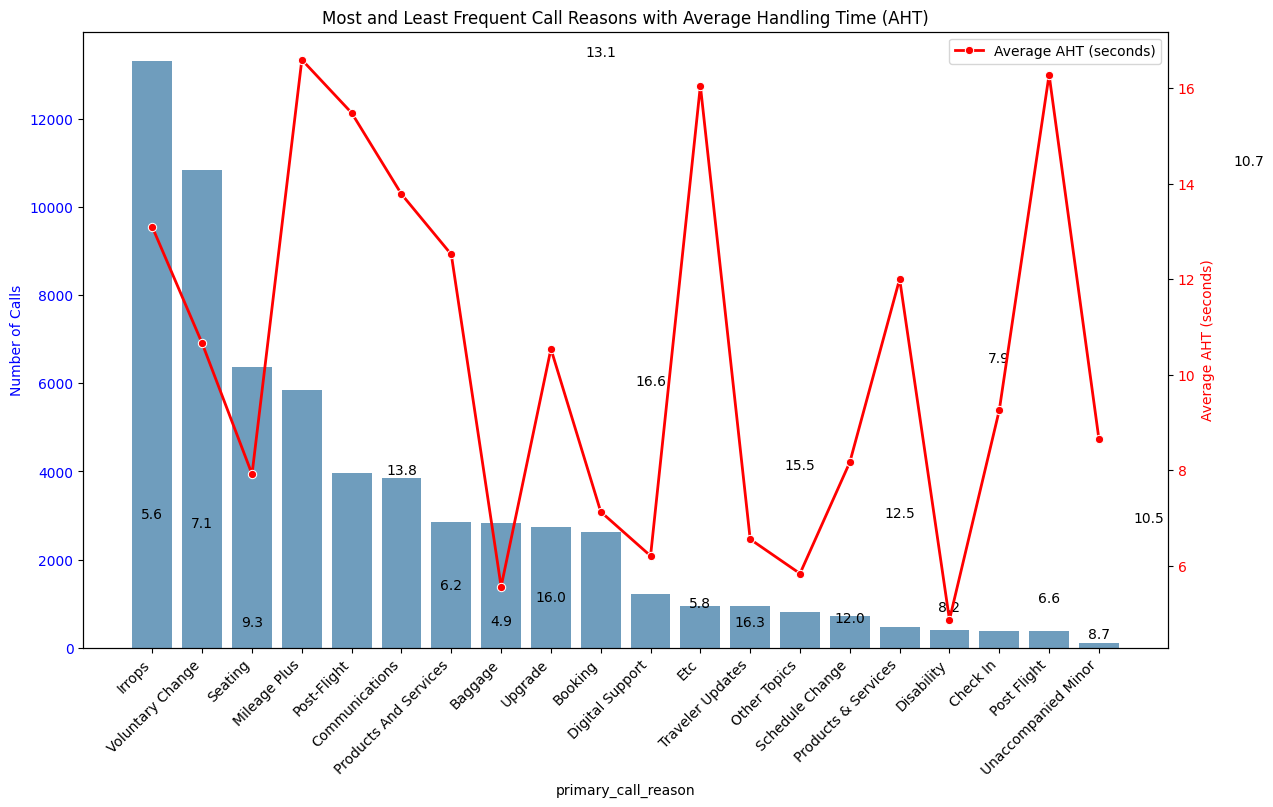

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `merged_df` is already defined and contains necessary columns

# Calculate frequency of each reason and average AHT
reason_freq_aht = merged_df.groupby('primary_call_reason').agg(
    call_count=('call_id', 'size'),  # Count of calls for each reason
    average_aht=('handling_time', 'mean')  # Average handling time for each reason
).reset_index()

# Sort by call frequency to identify most and least frequent reasons
reason_freq_aht_sorted = reason_freq_aht.sort_values(by='call_count', ascending=False)

# Select top 10 most frequent reasons
most_frequent_reasons = reason_freq_aht_sorted.head(10)

# Select top 10 least frequent reasons
least_frequent_reasons = reason_freq_aht_sorted.tail(10)

# Combine most and least frequent reasons for plotting
top_bottom_reasons = pd.concat([most_frequent_reasons, least_frequent_reasons])

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for call count
sns.barplot(x='primary_call_reason', y='call_count', data=top_bottom_reasons, ax=ax1, alpha=0.7)
ax1.set_ylabel("Number of Calls", color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.xticks(rotation=45, ha='right')
plt.title("Most and Least Frequent Call Reasons with Average Handling Time (AHT)")

# Create a secondary axis for AHT
ax2 = ax1.twinx()
sns.lineplot(x='primary_call_reason', y='average_aht', data=top_bottom_reasons, ax=ax2, color='red', marker='o', linewidth=2, label='Average AHT (seconds)')
ax2.set_ylabel("Average AHT (seconds)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add annotations for average AHT
for index, row in top_bottom_reasons.iterrows():
    ax1.text(index, row['call_count'] + 100, f"{row['average_aht']:.1f}", color='black', ha="center")

plt.show()


0      customer service, my name is Sarah how may I...
1     , my name is Sam, how can I help you today? C...
2      customer service, my name is Steve, how may ...
3      customer service, my name is James. How may ...
4      customer service, my name is Sarah how may I...
Name: cleaned_transcript, dtype: object


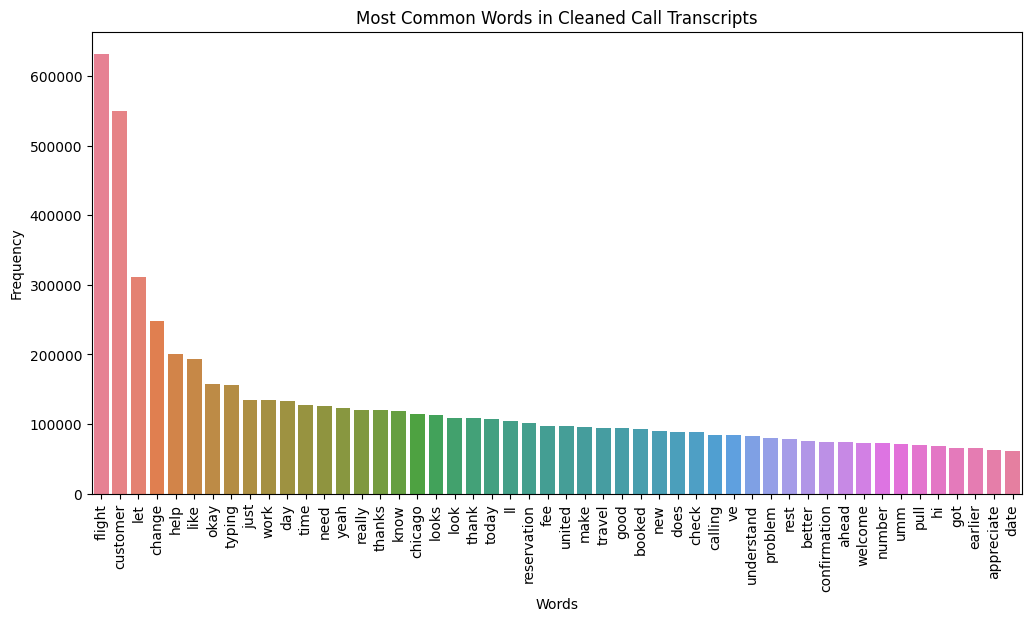

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import re
call_df=pd.read_csv('callsf0d4f5a.csv')
# Clean the call transcripts
def clean_transcript(text):
    # Remove newlines, extra spaces, and phrases like "Agent:"
    cleaned_text = re.sub(r'\n+', ' ', text)  # Remove multiple newlines
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)  # Remove extra spaces
    cleaned_text = re.sub(r'Agent:\s+', '', cleaned_text)  # Remove "Agent:" label
    cleaned_text = re.sub(r'Thank you for calling United Airlines', '', cleaned_text)  # Remove this repetitive phrase
    return cleaned_text

# Apply cleaning to the call transcripts
call_df['cleaned_transcript'] = call_df['call_transcript'].fillna('').apply(clean_transcript)

# Check cleaned transcripts
print(call_df['cleaned_transcript'].head())

# Using CountVectorizer to extract keywords from cleaned transcripts
vectorizer = CountVectorizer(max_features=50, stop_words='english')
X = vectorizer.fit_transform(call_df['cleaned_transcript'])

# Convert to a DataFrame for easy visualization
word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Plotting the most common words in cleaned call transcripts
word_freq_sum = word_freq_df.sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=word_freq_sum.index, y=word_freq_sum.values, hue=word_freq_sum.index, dodge=False)
plt.xticks(rotation=90)
plt.title("Most Common Words in Cleaned Call Transcripts")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


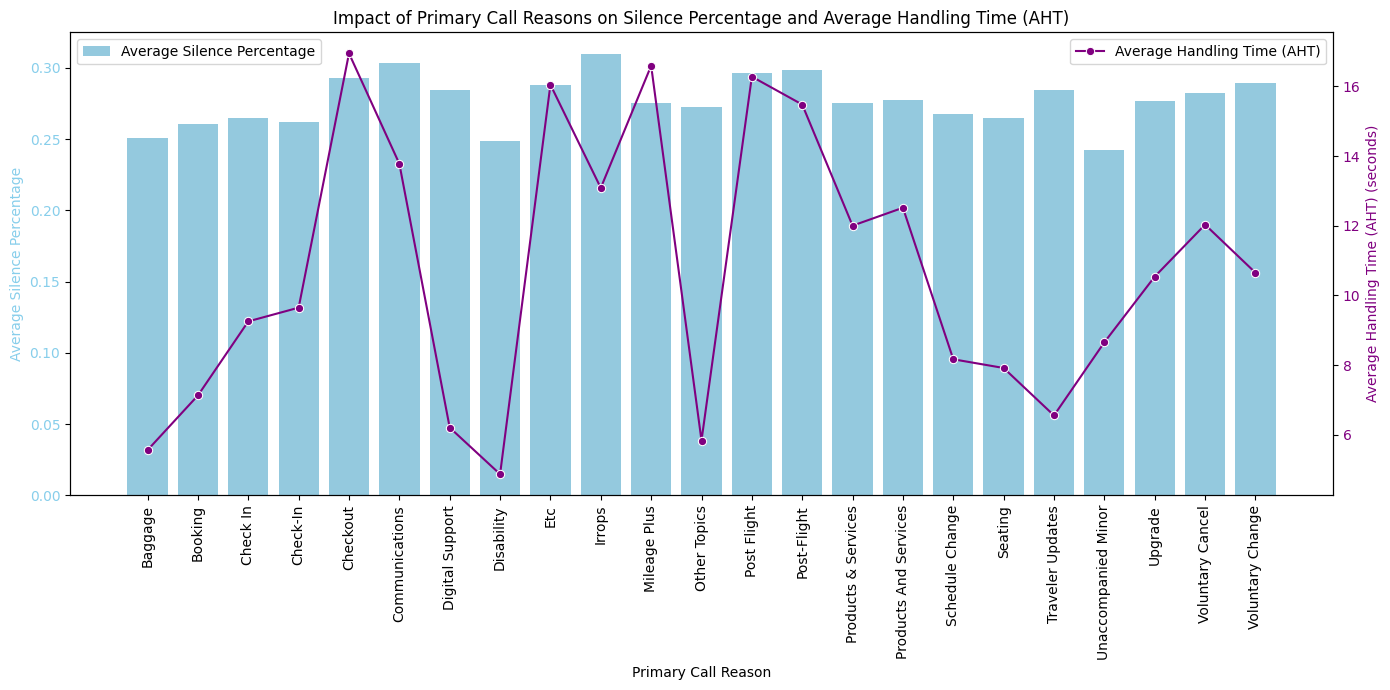

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for average silence percentage
sns.barplot(data=reason_analysis, x='Primary Call Reason', y='Average Silence Percentage', ax=ax1, color='skyblue', label='Average Silence Percentage')
ax1.set_ylabel('Average Silence Percentage', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Set x-ticks
ax1.set_xticks(range(len(reason_analysis['Primary Call Reason'])))
ax1.set_xticklabels(reason_analysis['Primary Call Reason'], rotation=90)

# Create a second y-axis for AHT
ax2 = ax1.twinx()
sns.lineplot(data=reason_analysis, x='Primary Call Reason', y='Average Handling Time (AHT)', ax=ax2, color='purple', marker='o', label='Average Handling Time (AHT)')
ax2.set_ylabel('Average Handling Time (AHT) (seconds)', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Adding titles and legends
plt.title('Impact of Primary Call Reasons on Silence Percentage and Average Handling Time (AHT)')
fig.tight_layout()  # To adjust layout
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()
